# Analysis of Small Cap Value Funds 
## Names: Pengwei Wang (pw8574), Pranav Chereku (atn844), Mark Moreno (mam24932), Rudraksh Garg (rg44778)

In [1]:
#Imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.interpolate import make_interp_spline
from scipy.stats import f_oneway
import itertools

from statsmodels.stats.multicomp import pairwise_tukeyhsd



Bad key text.latex.preview in file c:\Users\rudra\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file c:\Users\rudra\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file c:\Users\rudra\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

In [2]:
# Pull the returns of all mutual funds
returns = pd.read_csv("return_data_new.csv", encoding='unicode_escape')


c:\Users\rudra\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: DtypeWarning: Columns (2,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Pull data of small fund mutual funds using classification code SCVE
assets = pd.read_csv("small_fund_data_new.csv", encoding='unicode_escape')



In [4]:
returns.head()

,caldt,crsp_fundno,mtna,mret,mnav
0,19610428,NaN,NaN,NaN,NaN
1,19610531,NaN,NaN,NaN,NaN
2,19610731,NaN,NaN,NaN,NaN
3,19610929,NaN,NaN,NaN,NaN
4,19970131,1.0,0.100,NaN,NaN


In [7]:
# Get all Fund Numbers that are Small Cap Value Funds
fund_nos = list(assets["crsp_fundno"].unique())

In [8]:
# Filter for only Small Cap Value Funds 
returns = returns[returns["crsp_fundno"].isin(fund_nos)]

In [9]:
# Remove any rows that have missing information
returns = returns.dropna()

In [10]:
returns.shape

(209686, 5)

In [11]:
assets = assets[['ticker','crsp_fundno', 'caldt', 'per_com', 'per_pref', 'per_conv', 'per_corp', 'per_muni', 'per_govt', 'per_oth', 'per_cash', 'per_bond', 'per_abs', 'per_mbs', 'per_eq_oth', 'per_fi_oth', "turn_ratio"]]

In [12]:
# Rename columns for easy reading and later processing
assets = assets.rename(columns={ "per_com": "Common Stock",
                        "per_pref":"Preferred Stock", 
                        "per_conv":"Convertible Bonds",
                        "per_corp": "Corporate Bonds",
                        "per_muni":"Municipal Bonds",
                        "per_govt": "Government Bonds",
                        "per_oth" : "Other Securities",
                        "per_cash": "Cash",
                        "per_bond": "All Bonds",
                        "per_abs": "Asset-Backed Securities",
                        "per_mbs": "Mortgage-Backed Securities",
                        "per_eq_oth": "Other Equities",
                        "per_fi_oth": "Other Fixed-income Securities"
                    })

In [13]:
assets = assets.dropna()

In [14]:
# Data Preprocessing
returns = returns[pd.to_numeric(returns['mret'], errors='coerce').notnull()]
returns = returns[pd.to_numeric(returns['mtna'], errors='coerce').notnull()]

returns['mret'] = pd.to_numeric(returns['mret'])
returns['mtna'] = pd.to_numeric(returns['mtna'])

returns["caldt"] = pd.to_datetime(returns["caldt"], format="%Y%m%d")
assets["caldt"] = pd.to_datetime(assets["caldt"], format="%Y%m%d")

returns["year"] = returns["caldt"].dt.year

In [15]:
# Remove outliers
returns= returns[returns["mret"]<5]

# Analysis

## Plot Size vs Performance

See if evident relationship between two variables

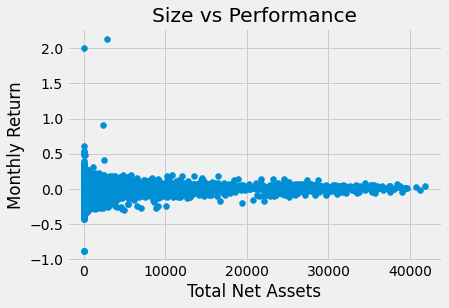

In [16]:
# Using recommended style
plt.style.use('fivethirtyeight')
# Plot size vs performance 
plt.ylabel("Monthly Return")
plt.xlabel("Total Net Assets")
plt.title("Size vs Performance")
plt.scatter(returns["mtna"], returns["mret"])

## Find the Base Statistics

In [17]:
# Find Correlation
returns.corr()["mret"]["mtna"]

0.006023873520539322

In [18]:
# Find mean of all returns
returns["mret"].mean()

0.008008233354362624

In [19]:
# Find standard error of all returns
returns["mret"].std()

0.05691329173385124

<AxesSubplot:>

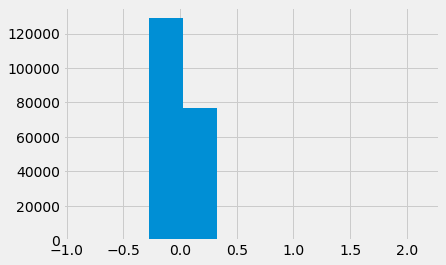

In [20]:
# Find standard error of all returns
returns["mret"].hist()

<AxesSubplot:>

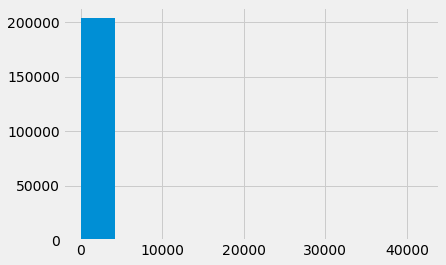

In [21]:
# Find standard error of all sizes
returns["mtna"].hist()

## Binning

In [22]:
# Set number of bins and label of bins
LABEL_COUNT = 3
LABELS = ["small", "mid", "large",]

In [23]:
# Split the dataset to group data equally
returns["tna_bins"] = pd.qcut(returns["mtna"], LABEL_COUNT, labels=LABELS)

In [24]:
# Confirm that the groupings are roughly equal in size
returns["tna_bins"].value_counts()

small    68794
large    68682
mid      68584
Name: tna_bins, dtype: int64

## Plot binned returns

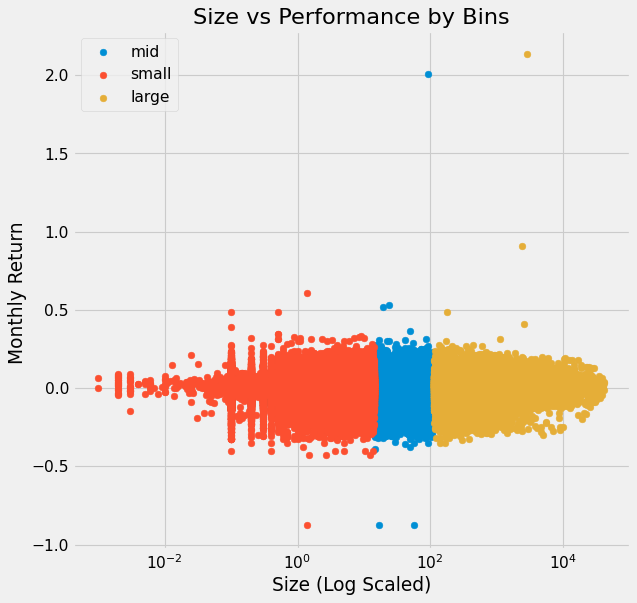

In [25]:
# Plot size vs performance given bins
plt.figure(figsize=(8, 8), dpi=80)

for i in returns["tna_bins"].unique():
    plt.scatter(returns[returns["tna_bins"] == i]["mtna"], returns[returns["tna_bins"] == i]["mret"], label=i)
  
plt.xlabel("Size (Log Scaled)")
plt.ylabel("Monthly Return ")
plt.title("Size vs Performance by Bins")
plt.xscale("log")
plt.legend()
plt.show()


## Plot as Time Series

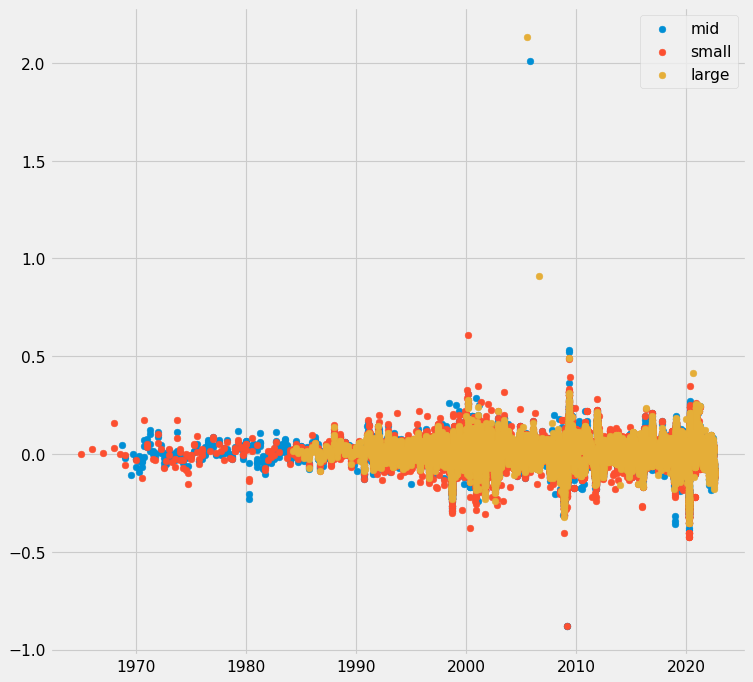

In [26]:
# Not in report: Plot each data point over time 
plt.figure(figsize=(10, 10), dpi=80)

for i in returns["tna_bins"].unique():
    plt.scatter(returns[returns["tna_bins"] == i]["caldt"], returns[returns["tna_bins"] == i]["mret"], label=i)
  
plt.legend()
plt.show()


In [27]:
# Get numbers of monthly returns per year
count_by_bin = {}
for i in returns["tna_bins"].unique():
    count_by_bin[i] = returns.groupby(returns[returns["tna_bins"] == i]["caldt"].dt.year).count()

In [28]:
# Get returns over years by bin
returns_by_bin = {}
for i in returns["tna_bins"].unique():
    returns_by_bin[i] = returns.groupby(returns[returns["tna_bins"] == i]["caldt"].dt.year).mean()

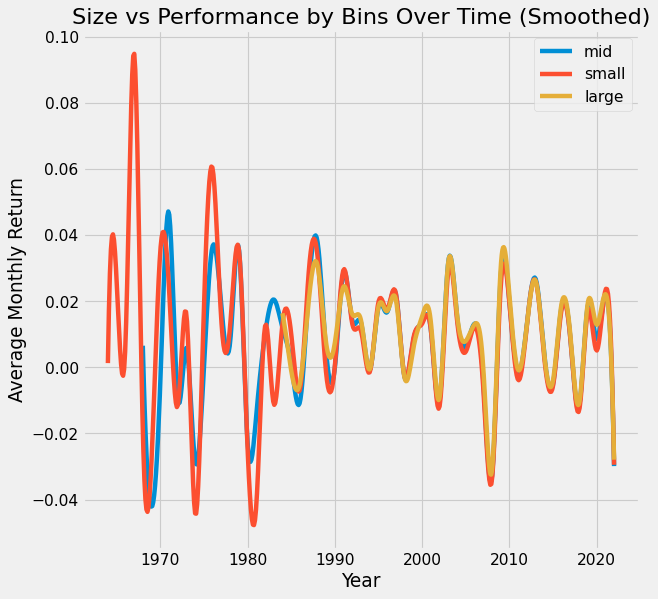

In [29]:
# Plot Size vs Performance Over Time with Yearly Average
plt.figure(figsize=(8, 8), dpi=80)



for i in returns["tna_bins"].unique():
    year_return = returns_by_bin[i]
    # Smooth graph
    x = year_return["year"]
    y = year_return["mret"]
    X_Y_Spline = make_interp_spline(x, y)

    X_ = np.linspace(x.min(), x.max(), 500)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label=i)

plt.xlabel("Year")
plt.ylabel("Average Monthly Return")
plt.title("Size vs Performance by Bins Over Time (Smoothed)")
plt.legend()
plt.show()

## Get Binned Stats

In [30]:
# Print min and max for each bin
for i in returns["tna_bins"].unique():
    print(i)
    print("mean:", returns[returns["tna_bins"] == i]["mtna"].min())
    print("std:", returns[returns["tna_bins"] == i]["mtna"].max())

mid
mean: 14.204
std: 114.7
small
mean: 0.0
std: 14.2
large
mean: 114.758
std: 41868.3


In [31]:
# Print means and std for each bin
for i in returns["tna_bins"].unique():
    print(i)
    print("mean:", returns[returns["tna_bins"] == i]["mret"].mean())
    print("std:", returns[returns["tna_bins"] == i]["mret"].std())

mid
mean: 0.008100092353901835
std: 0.05730721696508269
small
mean: 0.007059261810623036
std: 0.059469656898519276
large
mean: 0.008867024460557458
std: 0.05380182606708812


## Run Statistic Tests

In [32]:
# Create lists of group labels for each return and the returns of each size
groups = []
returns_bins = []
for i in returns["tna_bins"].value_counts().index:
    groups += [i] * returns["tna_bins"].value_counts()[i]
    returns_bins.append(list(returns[returns["tna_bins"] == i]["mret"]))

In [33]:
# Run ANOVA test
f_oneway(*returns_bins)


F_onewayResult(statistic=17.47441361883415, pvalue=2.5798953966918834e-08)

In [34]:
all_returns_ordered = list(itertools.chain.from_iterable(returns_bins))

In [35]:
df = pd.DataFrame({'score': all_returns_ordered,
                   'group': groups}) 

In [36]:
df

,score,group
0,-0.090784,small
1,0.016641,small
2,0.063988,small
3,0.013986,small
4,-0.012414,small
...,...,...
206055,0.029505,mid
206056,0.016092,mid
206057,-0.079186,mid
206058,0.008758,mid


In [37]:
# Run Tukey Test
tukey = pairwise_tukeyhsd(endog=df['score'],
                          groups=df['group'],
                          alpha=0.05)

#display results
print(tukey)


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 large    mid  -0.0008 0.0336 -0.0015    -0.0   True
 large  small  -0.0018  0.001 -0.0025 -0.0011   True
   mid  small   -0.001  0.002 -0.0018 -0.0003   True
----------------------------------------------------


## Find Fund Holding Based on Size

In [38]:
# Merge asset data with returns data
all_data = pd.merge(assets, returns, on=['crsp_fundno','caldt'], how='inner')

In [39]:
all_data.columns

Index(['ticker', 'crsp_fundno', 'caldt', 'Common Stock', 'Preferred Stock',
       'Convertible Bonds', 'Corporate Bonds', 'Municipal Bonds',
       'Government Bonds', 'Other Securities', 'Cash', 'All Bonds',
       'Asset-Backed Securities', 'Mortgage-Backed Securities',
       'Other Equities', 'Other Fixed-income Securities', 'turn_ratio', 'mtna',
       'mret', 'mnav', 'year', 'tna_bins'],
      dtype='object')

In [40]:
# Get only holding info
all_data[['ticker', 'Common Stock',
       'Preferred Stock', 'Convertible Bonds', 'Corporate Bonds',
       'Municipal Bonds', 'Government Bonds', 'Other Securities', 'Cash',
       'Asset-Backed Securities', 'Mortgage-Backed Securities',
       'Other Equities',
       'Other Fixed-income Securities', 'mtna', 'tna_bins']]

,ticker,Common Stock,Preferred Stock,Convertible Bonds,Corporate Bonds,Municipal Bonds,Government Bonds,Other Securities,Cash,Asset-Backed Securities,Mortgage-Backed Securities,Other Equities,Other Fixed-income Securities,mtna,tna_bins
0,ARSMX,88.87,0.0,0.0,0.00,0.0,0.00,1.06,10.07,0.0,0.0,0.00,0.0,9.7,small
1,ARSMX,91.25,0.0,0.0,0.00,0.0,0.00,0.00,8.75,0.0,0.0,0.00,0.0,7.5,small
2,ARSMX,93.63,0.0,0.0,0.00,0.0,0.00,0.54,5.83,0.0,0.0,0.00,0.0,5.8,small
3,ARSMX,100.23,0.0,0.0,0.00,0.0,0.00,0.00,-0.23,0.0,0.0,0.00,0.0,6.3,small
4,ARSMX,93.20,0.0,0.0,0.00,0.0,0.00,0.28,6.52,0.0,0.0,0.00,0.0,6.8,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19850,MMMMX,99.05,0.0,0.0,0.00,0.0,0.00,0.00,0.95,0.0,0.0,0.58,0.0,0.9,small
19851,MMMMX,98.15,0.0,0.0,0.00,0.0,0.00,0.00,1.85,0.0,0.0,0.67,0.0,2.2,small
19852,AVCNX,99.34,0.0,0.0,0.00,0.0,0.00,0.59,0.07,0.0,0.0,0.00,0.0,0.1,small
19853,AVCNX,98.89,0.0,0.0,0.08,0.0,0.42,0.79,-0.18,0.0,0.0,0.00,0.0,0.1,small


In [41]:
# Get total percent of each asset class in holdings per size group 
holdings_df = pd.DataFrame()

for i in all_data["tna_bins"].unique():
    print(i)
    holdings = all_data[all_data["tna_bins"] == i][['Common Stock',
                    'Preferred Stock', 'Convertible Bonds', 'Corporate Bonds',
                    'Municipal Bonds', 'Government Bonds', 'Other Securities', 'Cash',
                    'Asset-Backed Securities', 'Mortgage-Backed Securities',
                    'Other Equities',
                    'Other Fixed-income Securities']].sum(axis=0)
    prop_holdings = holdings/all_data[all_data["tna_bins"] == i].shape[0]
    prop_holdings.name = i
    holdings_df = holdings_df.append(prop_holdings)


small
mid
large


In [42]:
# Prep Data for plotting
holdings_df.index = holdings_df.index.set_names(['size'])
holdings_df = holdings_df.reindex(LABELS)
holdings_df.reset_index(inplace=True)



In [43]:
# Round to 2 decimals
holdings_df = holdings_df.round(2)

In [44]:
holdings_df

,size,Common Stock,Preferred Stock,Convertible Bonds,Corporate Bonds,Municipal Bonds,Government Bonds,Other Securities,Cash,Asset-Backed Securities,Mortgage-Backed Securities,Other Equities,Other Fixed-income Securities
0,small,92.68,0.05,0.02,0.19,0.02,0.50,2.74,3.13,0.08,0.09,0.32,0.05
1,mid,92.97,0.02,0.04,0.12,0.02,0.51,2.64,3.14,0.06,0.03,0.21,0.06
2,large,92.32,0.04,0.02,0.14,0.01,0.38,2.86,3.79,0.04,0.03,0.16,0.07


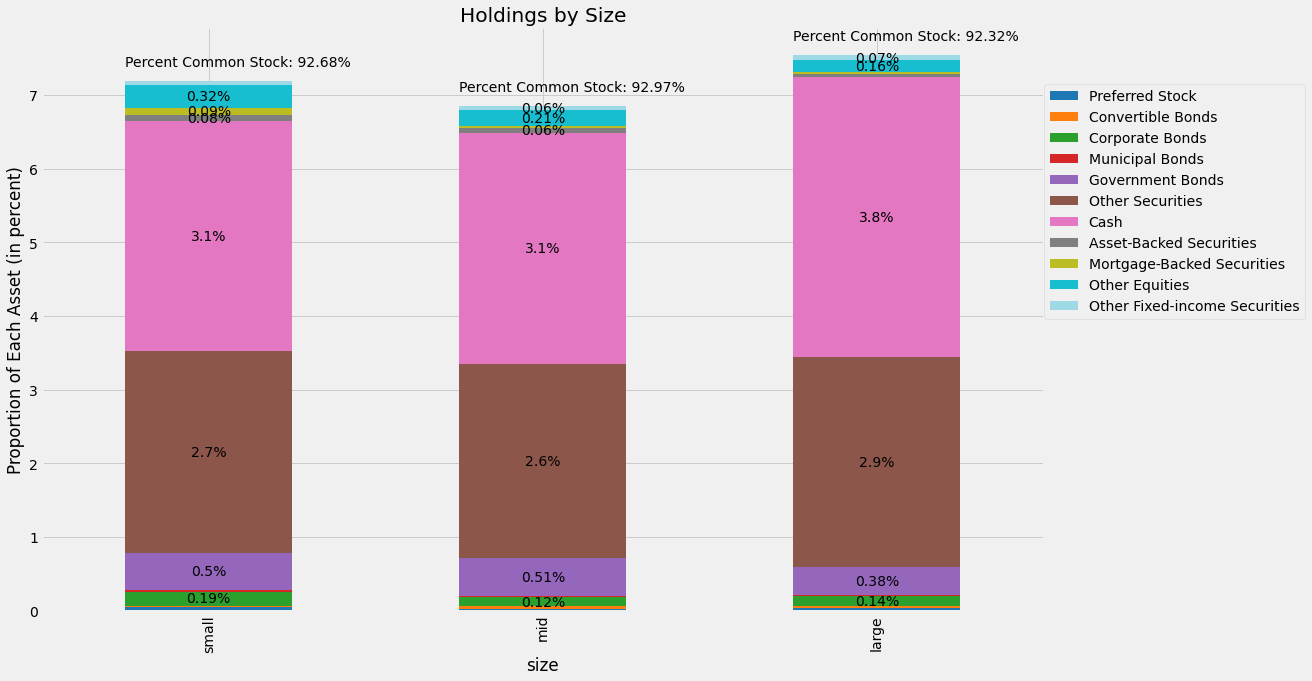

In [45]:
# Plot stacked bar chart of holding. Note: Ignore Common Stock as it is the majority holding in all cases
ax = holdings_df.drop("Common Stock", axis=1).round(2).plot(x='size', kind='bar', stacked=True, title='Holdings by Size', figsize=(16,10), colormap="tab20")
plt.ylabel("Proportion of Each Asset (in percent)")

# Place legend outside of plot
plt.legend(loc=(1,.5))


heights = []
widths = []

for c in ax.containers:

    # Do not print numbers for percents less than .05%
    threshold = 0.05
    labels = [f'{v:.2}%' if v > threshold else "" for v in c.datavalues]
    
    # Get height and width info for text
    widths.append((c[0].get_width()))
    heights.append(c.datavalues)
   
    # Add number to bars
    ax.bar_label(c, labels=labels, label_type='center', fmt='2')

# Add text showing common stock percent
bar_heights = [sum(x) for x in zip(*heights)]
current_width = -.5*widths[0]
for i in range(len(bar_heights)):
    # Align where the text should appear
    bar_height = bar_heights[i]
    # Print what text above each bar
    ax.text(current_width, bar_height + .2, "Percent Common Stock: " + str(holdings_df["Common Stock"][i]) + "%")
    current_width += 2*widths[i]
plt.show()

## Get Turnover Ratio

In [46]:
# Get turnover ratio infomation
turn_over_data = pd.merge(assets, returns, on=['crsp_fundno','caldt'], how='inner')[["caldt","ticker", "crsp_fundno", "turn_ratio", "tna_bins"]]

In [47]:
turn_over_data

,caldt,ticker,crsp_fundno,turn_ratio,tna_bins
0,2007-09-28,ARSMX,2810,0.42,small
1,2007-12-31,ARSMX,2810,0.55,small
2,2008-03-31,ARSMX,2810,0.55,small
3,2008-06-30,ARSMX,2810,0.55,small
4,2008-09-30,ARSMX,2810,0.55,small
...,...,...,...,...,...
19850,2021-03-31,MMMMX,97787,0.41,small
19851,2021-06-30,MMMMX,97787,0.41,small
19852,2021-03-31,AVCNX,98136,0.37,small
19853,2021-06-30,AVCNX,98136,0.37,small


In [48]:
# Get the average turnover ratio for each size group
turn_over_data.groupby("tna_bins").mean()["turn_ratio"]

tna_bins
small    1.114227
mid      0.723445
large    0.515092
Name: turn_ratio, dtype: float64